In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ec = pd.read_parquet('../data/raw/rmi_energy_communities_counties.parquet')

In [5]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 01043 to 48235
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   county_name                       2927 non-null   object 
 1   state_name                        2927 non-null   object 
 2   num_brownfields                   2927 non-null   int64  
 3   brownfield_acreage                2927 non-null   float64
 4   brownfield_acreage_mean_fill      2927 non-null   float64
 5   brownfield_acreage_median_fill    2927 non-null   float64
 6   num_coal_qualifying_tracts        2927 non-null   int64  
 7   percent_of_county_coal_qualified  2927 non-null   float64
 8   qualifies_by_employment_criteria  2927 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 208.7+ KB


In [6]:
brownfield_acreages = ['brownfield_acreage', 'brownfield_acreage_mean_fill', 'brownfield_acreage_median_fill']

In [7]:
ec[brownfield_acreages].sum()

brownfield_acreage                30458851.44
brownfield_acreage_mean_fill      71928448.65
brownfield_acreage_median_fill    30813940.72
dtype: float64

array([[<AxesSubplot: title={'center': 'brownfield_acreage'}>,
        <AxesSubplot: title={'center': 'brownfield_acreage_mean_fill'}>],
       [<AxesSubplot: title={'center': 'brownfield_acreage_median_fill'}>,
        <AxesSubplot: >]], dtype=object)

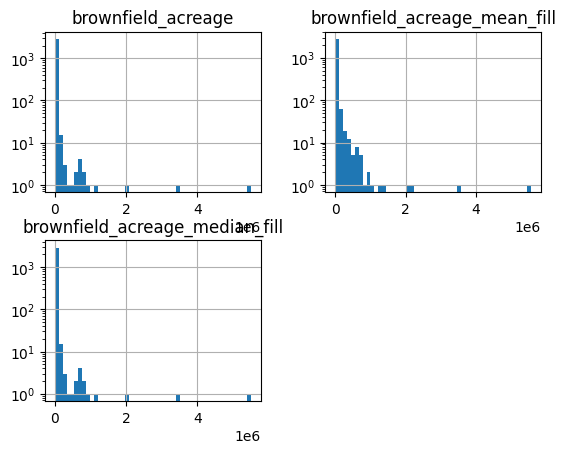

In [8]:
ec[brownfield_acreages].hist(bins=50, log=True)

In [9]:
ec[brownfield_acreages].eq(0).agg(['sum', 'mean'])

,brownfield_acreage,brownfield_acreage_mean_fill,brownfield_acreage_median_fill
sum,419.00000,148.000000,148.000000
mean,0.14315,0.050564,0.050564


array([[<AxesSubplot: title={'center': 'brownfield_acreage'}>,
        <AxesSubplot: title={'center': 'brownfield_acreage_mean_fill'}>],
       [<AxesSubplot: title={'center': 'brownfield_acreage_median_fill'}>,
        <AxesSubplot: >]], dtype=object)

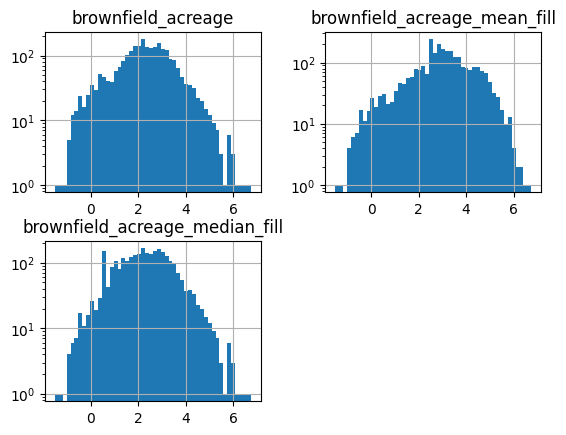

In [10]:
ec[brownfield_acreages].replace(0, np.nan).transform(np.log10).hist(bins=50, log=True)

## Look at raw data

In [12]:
# this data is stored locally, not on git. See RMI repo for source URL
# https://github.com/catalyst-cooperative/rmi-energy-communities/blob/brownfields-acreage/src/energy_comms/extract/epa.py
raw = pd.read_excel('../data/data_cache/re-powering-screening-dataset-2022.xlsx', sheet_name='RE-Powering Sites ')

In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190976 entries, 0 to 190975
Data columns (total 50 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Cross-Reference Number                                                 190976 non-null  int64  
 1   EPA Region                                                             190976 non-null  int64  
 2   State                                                                  190976 non-null  object 
 3   Program                                                                190976 non-null  object 
 4   Site ID                                                                190976 non-null  object 
 5   Site Information                                                       190961 non-null  object 
 6   Site Name                                                              18930

In [14]:
raw['Program'].value_counts()

BROWNFIELDS                                                                                  35067
WISCONSIN DEPARTMENT OF NATURAL RESOURCES REMEDIATION SITES                                  29659
MINNESOTA POLLUTION CONTROL AGENCY REMEDIATION SITES                                         23828
NEW JERSEY SITE REMEDIATION                                                                  13639
FLORIDA WASTE CLEANUP PROGRAM                                                                11492
WEST VIRGINIA ABANDONED COAL MINE AREAS                                                       6339
FLORIDA SOLID WASTE MANAGEMENT                                                                6051
CALIFORNIA DTSC CLEANUP PROGRAM                                                               6030
ILLINOIS SITE REMEDIATION PROGRAM                                                             6028
PENNSYLVANIA ABANDONED COAL MINE LANDS                                                        5586
OREGON DEQ

In [15]:
bf = raw.loc[raw['Program'].ne('SUPERFUND'),:]  # exclude superfund sites because they are not IRA elligible

In [16]:
bf['Acreage (Acres)'].sum()

30584722.394913986

In [17]:
program_acres = raw.groupby('Program')['Acreage (Acres)'].agg(['size', 'count', 'mean', 'median', 'min', 'max', 'sum'])

In [18]:
program_acres.sort_values('sum', ascending=False)

,size,count,mean,median,min,max,sum
Program,,,,,,,
RCRA,3864,3464,4421.900595,30.000000,0.010000,2.669225e+06,1.531746e+07
CALIFORNIA DTSC CLEANUP PROGRAM,6030,2126,4588.184855,7.000000,0.003000,1.100000e+06,9.754481e+06
SUPERFUND,1885,1732,5207.480276,40.000000,0.010000,9.180000e+05,9.019356e+06
BROWNFIELDS,35067,32263,45.990887,1.000000,0.010000,1.680000e+05,1.483804e+06
OREGON DEQ ENVIRONMENTAL CLEANUP PROGRAM,5488,2870,409.473710,4.610000,0.020000,8.770000e+05,1.175190e+06
PENNSYLVANIA ABANDONED COAL MINE LANDS,5586,5586,192.503744,150.902018,0.209345,3.768390e+03,1.075326e+06
WEST VIRGINIA ABANDONED COAL MINE AREAS,6339,6338,69.932873,21.645368,0.017512,2.925027e+03,4.432345e+05
VIRGINIA ABANDONED COAL MINE AREAS,1647,1647,160.279704,5.499233,0.000015,6.695354e+04,2.639807e+05
NEW YORK ENVIRONMENTAL SITE REMEDIATION PROGRAM,3949,3949,62.145394,2.802946,0.010268,8.133778e+04,2.454122e+05


In [19]:
# overall
raw['Acreage (Acres)'].agg(['size', 'count', 'mean', 'median', 'min', 'max', 'sum'])

size      1.909760e+05
count     8.208900e+04
mean      4.824529e+02
median    3.500000e+00
min       1.542143e-05
max       2.669225e+06
sum       3.960408e+07
Name: Acreage (Acres), dtype: float64

<AxesSubplot: >

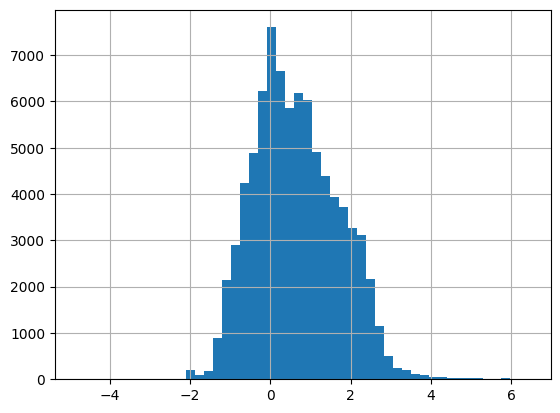

In [20]:
raw['Acreage (Acres)'].transform(np.log10).hist(bins=50)

<AxesSubplot: >

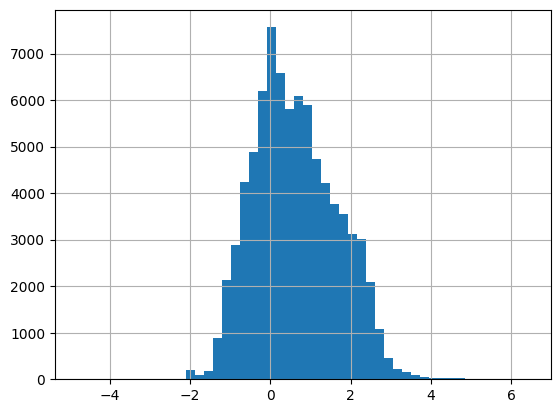

In [21]:
bf['Acreage (Acres)'].transform(np.log10).hist(bins=50)

<AxesSubplot: >

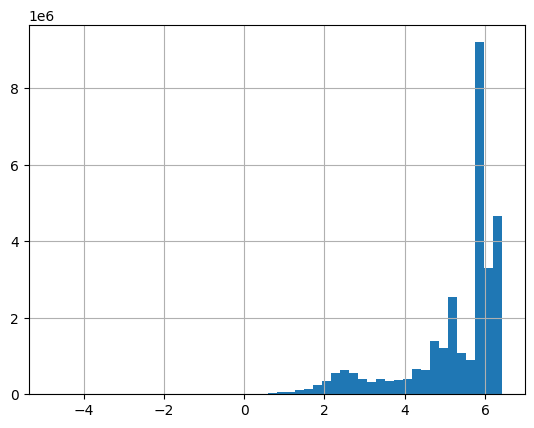

In [22]:
# area-weighted distribution is dominated by huge sites
logged = bf['Acreage (Acres)'].transform(np.log10) # annoying null handling
logged.hist(bins=50, weights=bf.loc[logged.notnull(), 'Acreage (Acres)'])

<AxesSubplot: >

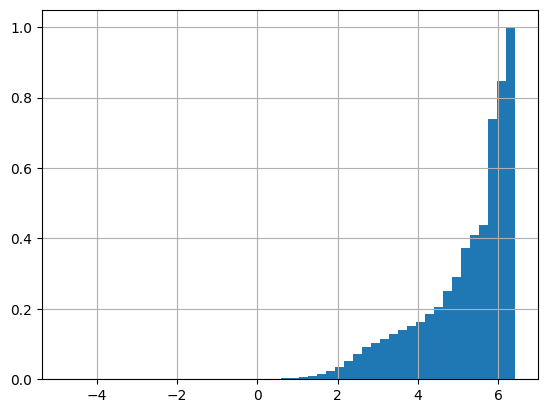

In [23]:
# cumulative area-weighted distribution
# shows that 80% of the area is in sites larger than about 20,000 acres
# 50% in sites larger than about 500,000 acres
logged.hist(bins=50, weights=bf.loc[logged.notnull(), 'Acreage (Acres)'], cumulative=True, density=True)

<AxesSubplot: >

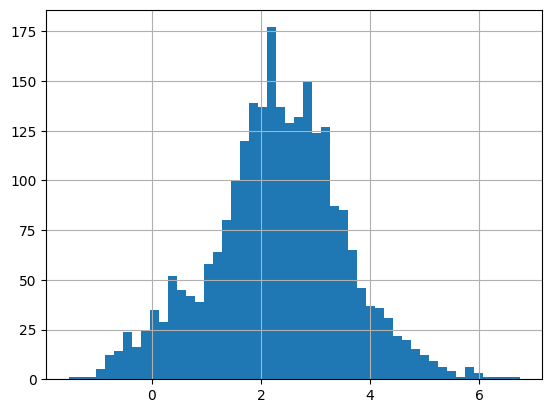

In [25]:
bf.dropna(subset=['Acreage (Acres)']).groupby(['State', 'County'])['Acreage (Acres)'].sum().replace(0, np.nan).transform(np.log10).hist(bins=50)

<AxesSubplot: >

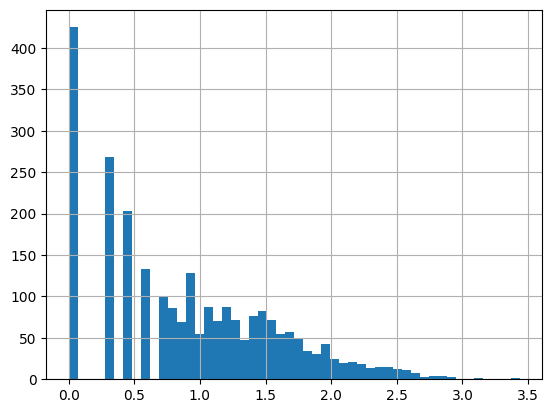

In [27]:
bf.dropna(subset=['Acreage (Acres)']).groupby(['State', 'County']).size().replace(0, np.nan).transform(np.log10).hist(bins=50)

In [28]:
bf.groupby(['State', 'County']).size().describe()

count    2775.000000
mean       68.140901
std       245.745721
min         1.000000
25%         3.000000
50%         9.000000
75%        40.000000
max      5917.000000
dtype: float64

The top of the list seems to be dominated by military facilities. My hypothesis is that military facilities are already accounted for in existing data and so should be excluded from the model used to impute the remaining facilities.

In [29]:
military_keywords = [
    'usmc',
    'weapons',
    'army',
    'naval', 
    'navy',
    '^fort',
    '^camp',
    'marine',
    'dept of energy',
    'corps',
    'mcas',
    'doe',
    'range',
    'afb',
    'air force',
    'usaf'
    'arsenal',
    'military',
]

In [30]:
# I'm sure there are plenty of false positives/negatives but let's start here
is_military = bf['Site Name'].str.lower().str.contains('|'.join(military_keywords), regex=True)

In [31]:
is_military.value_counts(dropna=False)

False    184689
True       2727
NaN        1675
Name: Site Name, dtype: int64

In [33]:
bf['Acreage (Acres)'].groupby(is_military, dropna=False).sum()  # most land is military land

Site Name
False    1.178429e+07
True     1.853627e+07
NaN      2.641661e+05
Name: Acreage (Acres), dtype: float64

In [37]:
# more than half of military sites have null acreage ☹️
bf['Acreage (Acres)'].isna().groupby(is_military, dropna=False).agg(['mean', 'sum'])

,mean,sum
Site Name,,
False,0.580533,107218
True,0.555922,1516
NaN,0.000000,0


<AxesSubplot: >

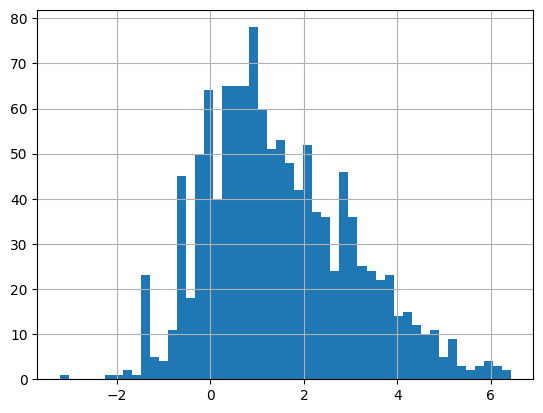

In [34]:
# distribution is much more top heavy
bf.loc[is_military.fillna(False), 'Acreage (Acres)'].transform(np.log10).hist(bins=50)

In [35]:
bf.loc[is_military.fillna(False) & bf['Acreage (Acres)'].isna(), 'Site Name']

3847                            MARINER'S WAY
3996              STRATFORD ARMY ENGINE PLANT
4259                    LAFB OPERABLE UNIT 12
4725                 ARMY GUARD TRAINING SITE
4769                            FORT WILLIAMS
                         ...                 
190665         FORT STEVENS MILITARY CEMETERY
190669    COLUMBIA BEACH MILITARY RESERVATION
190676      FORT CLATSOP - RIVER DAY USE SITE
190742                      CAMP WINEMA SPILL
190774       US ARMY GARRISON FORT WAINWRIGHT
Name: Site Name, Length: 1516, dtype: object

In [36]:
bf.loc[is_military.fillna(False) & bf['Acreage (Acres)'].isna(), 'Program'].value_counts()

WISCONSIN DEPARTMENT OF NATURAL RESOURCES REMEDIATION SITES    389
FLORIDA WASTE CLEANUP PROGRAM                                  203
CALIFORNIA DTSC CLEANUP PROGRAM                                183
MINNESOTA POLLUTION CONTROL AGENCY REMEDIATION SITES           123
NEW JERSEY SITE REMEDIATION                                    108
FLORIDA SOLID WASTE MANAGEMENT                                  95
MAINE REMEDIATION SITES                                         69
OREGON DEQ ENVIRONMENTAL CLEANUP PROGRAM                        62
IOWA LAND RECYCLING PROGRAM                                     55
ILLINOIS SITE REMEDIATION PROGRAM                               38
HAWAII HAZARD EVALUATION AND EMERGENCY RESPONSE OFFICE          33
BROWNFIELDS                                                     24
TEXAS VOLUNTARY CLEANUP PROGRAM                                 23
COLORADO VOLUNTARY CLEANUP AND REDEVELOPMENT PROGRAM            18
RCRA                                                          

OK nevermind, there are tons of military facilities with missing acreage numbers.